# <img style="float: left; padding-right: 10px; width: 45px" src="https://github.com/Harvard-IACS/2018-CS109A/blob/master/content/styles/iacs.png?raw=true"> CS-S109A Introduction to Data Science 

## Lecture 4: Multiple Linear Regression

**Harvard University**<br>
**Summer 2021**<br>
**Instructors:** Kevin Rader<br>
**Authors:** Rahul Dave, David Sondak, Will Claybaugh, Pavlos Protopapas, Chris Tanner, Kevin Rader

---

In [1]:
## RUN THIS CELL TO GET THE RIGHT FORMATTING 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

# Table of Contents 
<ol start="0">
<li> Learning Goals </li>
<li> Bootstrap Resampling</li>
<li> Multiple Linear Regression Basics</li>
<li> Predictors, predictors, predictors </li>
<li> Overfitting </li>    

## Learning Goals

This Jupyter notebook accompanies Lecture 4. By the end of this lecture, you should be able to:

- Know the basic approach to implementing resampling methods (bootstrapping and randomization testing) in python.
- Create *design matrices* to use for specific models to be fit.
- Be comfortable fitting, interpreting and using multiple regression models from both `sklearn` and `statsmodels`.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels as sm
import statsmodels.regression.linear_model as lm
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

## Part 0: Reading the data and re-fitting Lecture 3 models

We will be using the same data as last time (both the train and test splits): modeling `votergap` from the 2016 election (Trump-Clinton) from `density` (population density in persons per square mile) and other predictors where each row represents a county in the US. 

We start by reading in the datasets for you and refitting the simple regression models from last time:

**Important note: use the training dataset for all exploratory analysis and model fitting.  Only use the test dataset to evaluate and compare models.**


In [3]:
#read in the two files
train = pd.read_csv("../data/county_election_20_train.csv")
test = pd.read_csv("../data/county_election_20_test.csv")

#calculate the response: votergap
votergap_train = 100*(train['biden_perc']-train['trump_perc'])
votergap_test = 100*(test['biden_perc']-test['trump_perc'])
train['votergap'] = votergap_train
test['votergap'] = votergap_test

#recall we log-transformed population density to make linear regression more appropriate
train['log_density'] = np.float64(np.log(train['density']))
test['log_density'] = np.float64(np.log(test['density']))

# and we fit the simple regression model for y = votergap and x = log_density in both sklearn and statmodels

# sklearn: note the better way to define a single predictor design matrix
regress1 = LinearRegression(fit_intercept=True).fit(train[['log_density']], train['votergap'])
print("Beta0 =", regress1.intercept_ ,", Beta1 =", regress1.coef_)

# statsmodels approach: remember to manually add the intercept.
X = sm.tools.add_constant(train['log_density'])
model1 = lm.OLS(train['votergap'],X).fit()
print("Statmodels results: \n",model1.params,sep="")

model1.summary()

Beta0 = -51.56651935005564 , Beta1 = [5.21615611]
Statmodels results: 
const         -51.566519
log_density     5.216156
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               votergap   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     220.1
Date:                Wed, 30 Jun 2021   Prob (F-statistic):           9.07e-48
Time:                        07:51:01   Log-Likelihood:                -12027.
No. Observations:                2491   AIC:                         2.406e+04
Df Residuals:                    2489   BIC:                         2.407e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -51.5665      1.473    -35.003      0.000     -54.455     -48.678
log_density     5.2162      0.352     14.834      0.000       4.527       5.906
==============================================================================
Omnibus:                      211.913   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              266.821
Skew:                           0.789   Prob(JB):                     1.15e-58
Kurtosis:                       3.283   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

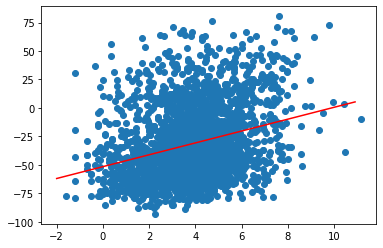

In [4]:
# Plot the line on the scatterplot

x_dummy = np.arange(-2,11,0.1)
yhat_dummy_regress = regress1.predict(x_dummy.reshape(-1, 1))

plt.scatter(train['log_density'],train['votergap'])
plt.plot(x_dummy,yhat_dummy_regress,c="r",label="Linear Regression")

plt.show()

In [5]:
# And finally, evaluate on the test set (useful going forward):

yhat1_train = regress1.predict(train[['log_density']])
yhat1_test = regress1.predict(test[['log_density']])

r2_train = sk.metrics.r2_score(train['votergap'], yhat1_train)
r2_test = sk.metrics.r2_score(test['votergap'], yhat1_test)

mse_train = sk.metrics.mean_squared_error(train['votergap'], yhat1_train)
mse_test = sk.metrics.mean_squared_error(test['votergap'], yhat1_test)
      
results1 = pd.DataFrame(index = ["train","test"])    
results1['R-squared'] = [r2_train,r2_test]
results1['MSE'] = [mse_train,mse_test]

results1

,R-squared,MSE
train,0.081231,914.656221
test,0.080230,1053.468653


**Q0.1** Calculate the residuals for the train set from the linear regression model.  Plot the histogram of residuals and residuals-vs.-predicted scatterplot.  Comment on the assumptions of the linear regression model.

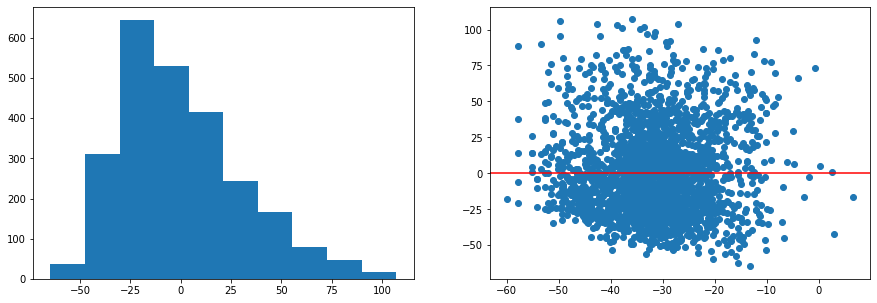

In [6]:
######
# your code here
######


residuals = train['votergap'] - yhat1_train

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(residuals)
ax[1].scatter(yhat1_train, residuals)
ax[1].axhline(y=0, c="red")

plt.show()


The residual histogram and scatterplot below illustrate that the assumptions are reasonable (even though the residuals are moderately left-skewed, there are not any extreme outliers).  The residual scatterplot does not show any clear non-linearities (curvature) or non-constant variance (sometimes called heteroscedasticity), however there is a "hole" in the residuals in the lower-left part of the residual scatterplot (due to votergap being bounded at -100).

## Part 1: Bootstrap in Linear Regression 

The residual histogram is clearly non-normal, and this may affect teh reliability of probabilistic based inference ($t$-distribution based ones).  The bootstrap approach is an alternative method to build confidence intervals when this assumption is violated.

**Q1.1** Perform a bootstrap approach to calculate the 95\% confidence intervals based on the method, and compare them to the probabilistic-based ones above from statsmodels.

In [7]:
######
# your code here
######

# define some parameters and initializations:
nboots = 1000
n = np.size(train['votergap'])
np.random.seed(109)
beta1_boots = []

# use a for loop to do the reampling for us
for boot in np.arange(nboots):
    indices = np.random.choice(n,size=n,replace=True)
    ######
    # your code here
    ######
    y_boot = train['votergap'].iloc[indices]
    x_boot = train['log_density'].iloc[indices].values.reshape(-1, 1)
    regress_boot = LinearRegression(fit_intercept=True).fit(x_boot, y_boot)
    beta1_boot = regress_boot.coef_[0]
    beta1_boots.append(beta1_boot)

The empirical bootstrap 95% confidence interval for the slope is: [4.39546215 5.9444841 ]


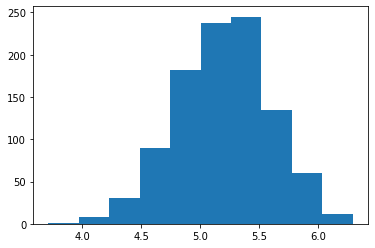

In [8]:

    
# plot the histogramand pull of the quantiles from the results array using np.quantile and 


######
# your code here
######
    
print("The empirical bootstrap 95% confidence interval for the slope is:",np.quantile(beta1_boots,[0.025,0.975]))

plt.hist(beta1_boots)
plt.show()

*your answer here*

**Solutions:**

The bootstrap confidence interval is (4.40, 5.94) while the standard $t$-based confidence interval is (4.53, 5.91): they are very similar to each other (centered in a similar place, the bootstrap interval is slightly wider) and the difference in widths is likely due to the outliers in the upper right of the original scatterplot adding extra variabilitiy into the bootstrap approach (sometimes they are not included in the bootstrap resample while sometimes they are included multiple times).

Alternatively, hypothesis testing can be performed with a similar resampling approach (call the permutation or randomization test).  As all hypothesis tests, the sampling distribution (of the statistic of interest: here it is $\beta_1$) should be determined assuming the null hypothesis to be true (to fix the Type 1 error rate at $\alpha = 0.05$).  

Thus, rather than bootstrap resampling the obseervations from the data set, the association is removed empirically: by reshuffling the response variable across the measurements in the predictor variable(s).  One iteration is shown below:

In [9]:
n = np.size(train['votergap'])
y_perm = np.random.choice(train['votergap'],size=n,replace=False)
regress_perm = LinearRegression(fit_intercept=True).fit(train[['log_density']], y_perm)

print("Observed Beta1 =", regress1.coef_, ", Permuted Beta1 =", regress_perm.coef_)


Observed Beta1 = [5.21615611] , Permuted Beta1 = [-0.14217528]


Here we see that our permutaed $\hat{\beta}_1$ is much closer to the null value of zero (in magnitude) than the actual observed one.  Thus our empirically estimated p-value is 0 (our repermuted slope was more extreme than what was actually observed 0 times out of 1 permutation iterations).

**Q1.2** Perform a permutation test (with 1000 iterations) to test whether the linear relationship between `votergap` and `log_density` is statistically significant.

Empirical estimate of the p-value based on 1000 iterations is: 0.0


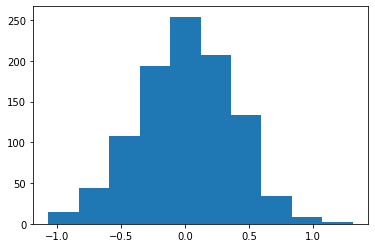

In [10]:
######
# your code here
######

nperms = 1000
n = np.size(train['votergap'])
np.random.seed(109)
beta1_perms = []

# use a for loop to do the reampling for us
for boot in np.arange(nboots):
    ######
    # your code here
    ######
    y_perm = np.random.choice(train['votergap'],size=n,replace=False)
    regress_perm = LinearRegression(fit_intercept=True).fit(train[['log_density']], y_perm)

    beta1_perms.append(regress_perm.coef_[0])

plt.hist(beta1_perms)
print("Empirical estimate of the p-value based on 1000 iterations is:" , 
      np.mean(np.abs(beta1_perms)>np.abs(regress1.coef_[0])))

The sampling distribution based on this permutation test (derived assuming the null hypothesis) is no where near the actual observed slope of 5.22.  So no permutation estimates were larger in magnitude than the actual observed estimate, the empirical p-value is calculated to be 0/1000; essentially zero.  There is plenty of evidence to reject the null hypothesis and conclude that voter gap is linearly related to log-density (in fact, negatively related).

## Part 2: Multiple Regression

There are many more predictors in the data set (see below), which are mostly percentage of residents in the county (income is median income in dollars, and cancer is number of cancer cases per 100,000 residents per year).

In [11]:
print(train.columns)
train.describe()

Index(['fips', 'biden_count', 'trump_count', 'totalvotes', 'biden_perc', 'trump_perc', 'state', 'fipscode', 'county', 'population', 'hispanic', 'minority', 'female', 'unemployed', 'income', 'nodegree', 'bachelor', 'inactivity', 'obesity', 'density', 'cancer', 'votergap16', 'trump16', 'clinton16', 'votergap', 'log_density'], dtype='object')


,fips,biden_count,trump_count,totalvotes,biden_perc,trump_perc,fipscode,population,hispanic,minority,female,unemployed,income,nodegree,bachelor,inactivity,obesity,density,cancer,votergap16,trump16,clinton16,votergap,log_density
count,2491.000000,2.491000e+03,2.491000e+03,2.491000e+03,2491.000000,2491.000000,2491.000000,2.491000e+03,2491.000000,2491.000000,2491.000000,2491.000000,2491.000000,2491.000000,2491.000000,2491.000000,2491.000000,2491.000000,2459.000000,2489.000000,2489.000000,2489.000000,2491.000000,2491.000000
mean,30600.615817,2.609544e+04,2.406353e+04,5.108452e+04,0.332874,0.649359,30600.615817,9.925379e+04,9.155308,14.842454,49.940623,5.489322,47129.566841,14.991489,20.090606,25.971497,31.023926,268.705379,227.866653,31.882211,63.578619,31.696417,-31.648500,3.818524
std,14959.196289,1.012377e+05,5.528518e+04,1.550476e+05,0.156969,0.158724,14959.196289,3.284090e+05,13.390254,15.761782,2.289133,1.910144,12053.751287,6.709648,8.790967,5.159646,4.463245,1884.711742,56.165696,30.368746,15.389880,15.107678,31.558248,1.724337
min,1001.000000,4.000000e+00,6.000000e+01,6.600000e+01,0.030909,0.087300,1001.000000,4.500000e+01,0.205000,0.855000,28.479000,1.800000,21658.000000,1.300000,2.600000,8.100000,11.800000,0.200000,46.200000,-80.987000,8.322000,3.636000,-93.090909,-1.609438
25%,19044.000000,1.306500e+03,3.718000e+03,5.354000e+03,0.212737,0.558020,19044.000000,1.110600e+04,2.132500,4.257500,49.510000,4.200000,38905.500000,9.900000,14.000000,22.700000,28.350000,17.700000,192.550000,15.095000,54.987000,20.595000,-56.041734,2.873565
50%,29219.000000,3.738000e+03,8.354000e+03,1.264000e+04,0.300282,0.681755,29219.000000,2.579600e+04,4.014000,8.168000,50.377000,5.300000,45226.000000,13.500000,18.000000,25.900000,31.200000,46.600000,229.300000,37.718000,66.430000,28.658000,-38.136710,3.841601
75%,45068.000000,1.249000e+04,2.120600e+04,3.485100e+04,0.423081,0.772261,45068.000000,6.876900e+04,9.370500,19.717500,51.051500,6.500000,52510.500000,19.200000,23.600000,29.400000,33.900000,116.650000,264.450000,54.148000,74.804000,39.914000,-13.501772,4.759178
max,56043.000000,3.028885e+06,1.145530e+06,4.264365e+06,0.892559,0.961818,56043.000000,9.848011e+06,95.183000,93.411000,56.739000,24.000000,122641.000000,46.800000,72.000000,41.300000,47.600000,69468.400000,458.300000,91.636000,95.273000,89.329000,80.525826,11.148627


In [12]:
variables = ['state', 'fipscode', 'county', 'population', 'hispanic', 'minority', 'female', 
             'unemployed', 'income', 'nodegree', 'bachelor', 'inactivity', 'obesity', 'density', 
             'cancer', 'trump', 'clinton', 'votergap', 'log_density']


**Q2.1** Fit a simple regression model to predict `votergap` from `log_minority`.  Interpret the slope coefficient and its confidence interval.

In [13]:
######
# your code here
######
train['log_minority'] = np.float64(np.log(train['minority']))
test['log_minority'] = np.float64(np.log(test['minority']))


regress2_1 = LinearRegression(fit_intercept=True).fit(train[['log_minority']], train['votergap'])
print("Beta0 =", regress2_1.intercept_ ,", Beta1 =", regress2_1.coef_)

# statsmodels approach: remember to manually add the intercept.
X = sm.tools.add_constant(train['log_minority'])
model2 = lm.OLS(train['votergap'],X).fit()
model2.summary()

Beta0 = -69.1377627155765 , Beta1 = [16.89940796]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               votergap   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     930.1
Date:                Wed, 30 Jun 2021   Prob (F-statistic):          7.60e-174
Time:                        07:51:05   Log-Likelihood:                -11737.
No. Observations:                2491   AIC:                         2.348e+04
Df Residuals:                    2489   BIC:                         2.349e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -69.1378      1.342    -51.501      0.000     -71.770     -66.505
log_minority    16.8994      0.554     30.498      0.000      15.813      17.986
==============================================================================
Omnibus:                      130.592   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.467
Skew:                           0.596   Prob(JB):                     2.12e-33
Kurtosis:                       3.172   Cond. No.                         6.91
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The slope is estimated to be 16.899 with a confidence interval of (15.81, 17.99): a 1-unit change in log_minority (a 2.718-fold increase in the percentage of residents that are considered minorities) is associated with a 16.9 point increase in the votergap.  Counties with more minorities voted less in favor of Trump.

**Q2.2** Fit a multiple regression model to predict `votergap` from `log_minority` and `log_density`.  Interpret the slope coefficients.

In [14]:
######
# your code here
###### 

regress2_2 = LinearRegression(fit_intercept=True).fit(train[['log_minority','log_density']], train['votergap'])
print("Beta0 =", regress2_2.intercept_ ,", Beta's =", regress2_2.coef_)


Beta0 = -80.55822656740334 , Beta's = [15.76315933  3.65091077]


The slope for `log_minority` is now estimated to be 15.76 : a 1-unit change in log_minority (a 2.718-fold increase in the percentage of residents that are considered minorities) is associated with a 15.8 point increase in the voter gap if **population density is held constant**.  The slope for `log_density` is now estimated to be 3.65 : a 1-unit change in log_density (a 2.718-fold increase in population density) is associated with a 3.65 point increase in the voter gap if percentage of residents that are minorities is held constant.

**Q2.3** Compare the coefficient estimate for `log_density` in both the simple regression model and the multiple regression model.  Why are the different/similar?

The coefficient was estimated to be 5.22 in the simple regression is now about 1/3 less: 3.65.  This decrease is due to the fact that we are now controlling for the effect of log_minority, and density and minority percentage are positively correlated.  The estimate 5.22 was partially due to the 'confounding effect' of minority.

## Part 3: Predictors, predictors, predictors

In this part we will explore 3 very useful types of predictors commonly used in multiple regression (and modeling in general).

1. Categorical Predictors (and dummy variables)
2. Interaction Effects
3. Polynomial Terms as one approach to model non-linearities

**Q3.1** Create two sets of dummy variables: 
1. A variable called `high_density` to indicate whether a county is above the median population density of all counties in the training set.

2. For the 50 different states (+DC) in the `state` variable

Note: pandas's [pd.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) will be useful for the second task.  Note: it would be useful to use the argument `drop_first=True`

In [15]:
######
# your code here
######
train['high_density'] = 1*(train['density'] > np.median(train['density']))

state_dummies = pd.get_dummies(train['state'],drop_first=True)
train = pd.concat([train,state_dummies],axis=1)

print(state_dummies.shape)
train.head()

(2491, 49)


,fips,biden_count,trump_count,totalvotes,biden_perc,trump_perc,state,fipscode,county,population,hispanic,minority,female,unemployed,income,nodegree,bachelor,inactivity,obesity,density,cancer,votergap16,trump16,clinton16,votergap,log_density,log_minority,high_density,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,31037,1025,2636,3717,0.275760,0.709174,Nebraska,31037,Colfax County,10332,43.916,9.183,48.517,2.6,50758,28.1,14.1,25.5,31.5,11.4,238.9,41.425,68.443,27.018,-43.341404,2.433613,2.217354,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,24019,6857,8764,15977,0.429179,0.548539,Maryland,24019,Dorchester County,32043,4.919,32.272,52.301,7.4,42279,17.6,19.3,30.3,35.7,320.2,158.0,15.983,56.563,40.580,-11.935908,5.768946,3.474200,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,51019,12176,35600,48669,0.250180,0.731472,Virginia,51019,Bedford County,67154,2.053,10.154,50.575,4.4,55507,11.8,26.3,24.0,33.1,8.9,293.2,49.412,72.484,23.072,-48.129199,2.186051,2.317868,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,45031,15220,16832,32417,0.469507,0.519234,South Carolina,45031,Darlington County,66445,2.081,43.465,52.807,7.4,35640,19.5,16.1,32.5,37.7,36.8,270.2,3.735,50.523,46.788,-4.972700,3.605498,3.771956,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5135,1398,5938,7566,0.184774,0.784827,Arkansas,5135,Sharp County,17664,2.105,4.689,50.591,7.1,32101,18.5,10.6,31.4,37.3,28.6,330.4,54.278,74.593,20.315,-60.005287,3.353407,1.545219,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Q3.2** Fit a linear regression model to predict `votergap` from `high_density`.  Interpret the model coefficient estimates.  When would a model like this be preferred to using the quantitative version of `density` or `log_density`?

In [16]:
######
# your code here
######
regress3_2 = LinearRegression(fit_intercept=True).fit(train[['high_density']], train['votergap'])
print("Beta0 =", regress3_2.intercept_ ,", Beta1 =", regress3_2.coef_)

Beta0 = -37.65587368373397 , Beta1 = [12.03891275]


Counties that are below the median population density voted in favor of Trump by 37.66 points, while states above the median population density voted in favor of Trump by 12.04 points less: still 37.66 - 12.04 = 25.62 in favor of Trump.  This type of model could be preferred if the scatterplot showed a drop-off around the median as using this type of predictor models a step-function with a step at the median of the predictor.

**Q3.3** Fit a linear regression model to predict `votergap` from `state` (or the state dummies, whichever is easier) in both sklearn and in statsmodels.  Interpret the slope coefficient associated with Massachusetts.  

In [17]:
######
# your code here
######
state_dummies = pd.get_dummies(train['state'],drop_first=True)
regress3_3 = LinearRegression(fit_intercept=True).fit(state_dummies, train['votergap'])
print("Beta0 =", regress3_3.intercept_ ,", Beta for Mass =", regress3_3.coef_[state_dummies.columns=='Massachusetts'][0])

# statsmodels approach: remember to manually add the intercept.
X = sm.tools.add_constant(state_dummies)
model2 = lm.OLS(train['votergap'],X).fit()
model2.summary()



Beta0 = -27.731144842857148 , Beta for Mass = 63.22439307619035


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               votergap   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     28.21
Date:                Wed, 30 Jun 2021   Prob (F-statistic):          2.12e-199
Time:                        07:51:05   Log-Likelihood:                -11574.
No. Observations:                2491   AIC:                         2.325e+04
Df Residuals:                    2441   BIC:                         2.354e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -27.7311      3.403     -8.148      0.000     -34.405     -21.058
Alaska            49.0598     18.327      2.677      0.007      13.121      84.998
Arizona           28.0862      9.146      3.071      0.002      10.151      46.021
Arkansas         -13.2640      4.660     -2.846      0.004     -22.402      -4.126
California        39.3982      4.955      7.951      0.000      29.681      49.115
Colorado          13.3592      5.038      2.652      0.008       3.480      23.239
Connecticut       41.6524     10.940      3.807      0.000      20.200      63.105
Delaware          37.7011     15.093      2.498      0.013       8.105      67.297
Florida           -1.8012      5.068     -0.355      0.722     -11.739       8.136
Georgia           -0.8205      4.071     -0.202      0.840      -8.803       7.162
Hawaii            59.8457     18.327      3.265      0.001      23.907      95.784
Idaho            -20.8246      5.312     -3.921      0.000     -31.240     -10.409
Illinois          -3.2977      4.449     -0.741      0.459     -12.022       5.426
Indiana          -11.9714      4.524     -2.646      0.008     -20.843      -3.100
Iowa              -1.2563      4.426     -0.284      0.777      -9.936       7.423
Kansas           -24.9646      4.449     -5.611      0.000     -33.689     -16.241
Kentucky         -22.0303      4.308     -5.114      0.000     -30.477     -13.583
Louisiana         -3.2864      4.857     -0.677      0.499     -12.811       6.239
Maine             26.0314      8.101      3.213      0.001      10.145      41.918
Maryland          29.3368      6.634      4.422      0.000      16.328      42.346
Massachusetts     63.2244      8.101      7.804      0.000      47.338      79.111
Michigan           7.8396      4.695      1.670      0.095      -1.367      17.046
Minnesota          4.4131      4.524      0.975      0.329      -4.458      13.285
Mississippi       12.8631      4.611      2.790      0.005       3.821      21.905
Missouri         -25.5035      4.317     -5.908      0.000     -33.968     -17.039
Montana          -13.3981      5.038     -2.659      0.008     -23.277      -3.519
Nebraska         -30.8895      4.524     -6.828      0.000     -39.761     -22.018
Nevada           -14.2833      7.052     -2.025      0.043     -28.113      -0.454
New Hampshire     35.6646      9.146      3.899      0.000      17.730      53.599
New Jersey        36.2294      6.634      5.461      0.000      23.220      49.239
New Mexico        20.1758      6.126      3.294      0.001       8.163      32.188
New York          23.7606      4.930      4.820      0.000      14.094      33.427
North Carolina    10.7518      4.415      2.435      0.015       2.094      19.409
North Dakota     -20.0774      5.099     -3.938      0.000     -30.075     -10.079
Ohio        

In [18]:
print(np.mean(train['votergap'][train['state']=="Alabama"]))

np.mean(train['votergap'])

-27.731144842857137


-31.648499716619785

The coefficient associated with Massachusetts is -58.46, which estimates the difference in voter gap comparing Mass. to the reference group, Alabama, on average. 



A single interaction term is easy to calculate manually, but the job can be a chore if there are a lot of interaction terms you want to create.  Below is the code to create an interaction term both ways:

In [19]:
train['minority_density_interact'] = train['log_minority']*train['log_density']

X_interact = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(
                                                                train[['log_minority','log_density']])
pd.DataFrame(X_interact).head()

,0,1,2
0,2.217354,2.433613,5.396182
1,3.474200,5.768946,20.042471
2,2.317868,2.186051,5.066978
3,3.771956,3.605498,13.599779
4,1.545219,3.353407,5.181749


**Q3.4** Fit a linear regression model to predict `votergap` from `log_minority`, `log_density` and their interaction.  Print out the coefficient estimates for this model and interpret the interaction term.  How does this model compare to the multiple regression model in Q2.2?

In [20]:
######
# your code here
######

regress3_4 = LinearRegression(fit_intercept=True).fit(train[['log_minority','log_density','minority_density_interact']], train['votergap'])
print("Beta0 =", regress3_4.intercept_ ,", Beta1 =", regress3_4.coef_)

X = sm.tools.add_constant(train[['log_minority','log_density','minority_density_interact']])
model3_4 = lm.OLS(train['votergap'],X).fit()
model3_4.summary()

Beta0 = -68.6720492482707 , Beta1 = [10.31124881  0.45749809  1.41481447]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               votergap   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     382.4
Date:                Wed, 30 Jun 2021   Prob (F-statistic):          3.17e-204
Time:                        07:51:05   Log-Likelihood:                -11660.
No. Observations:                2491   AIC:                         2.333e+04
Df Residuals:                    2487   BIC:                         2.335e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -68.6720      3.208    -21.405      0.000     -74.963     -62.381
log_minority                 10.3112      1.382      7.459      0.000       7.601      13.022
log_density                   0.4575      0.805      0.568      0.570      -1.122       2.037
minority_density_interact     1.4148      0.330      4.293      0.000       0.769       2.061
==============================================================================
Omnibus:                      155.065   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.750
Skew:                           0.642   Prob(JB):                     1.26e-40
Kurtosis:                       3.352   Cond. No.                         78.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The interaction coefficient is estimated to be 1.415 here, and is statistically significant ($t=4.293, p<0.001$).  This suggests that the positive effect of increasing `log_minority` on votergap is even stronger at high values of `log_density` (and vice versa).

Similarly, polynomial terms are easy to calculate manually, but the job can be a chore if the order of polynomial function gets high.  Below is the code to create some polynomial terms both manually and using pd.PolynomialFeatures (note: PolynomialFeatures can be used to create interaction terms, polynomial terms, or both!):

In [21]:
train['log_minority_2'] = train['log_minority']**2
train['log_minority_3'] = train['log_minority']**3

X_poly = PolynomialFeatures(3, include_bias=False).fit_transform(train[['log_minority']])

train[['log_minority','log_minority_2','log_minority_3']].head()
#pd.DataFrame(X_poly).head()



,log_minority,log_minority_2,log_minority_3
0,2.217354,4.916659,10.901972
1,3.474200,12.070066,41.933821
2,2.317868,5.372511,12.452769
3,3.771956,14.227652,53.666078
4,1.545219,2.387703,3.689525


**Q3.5** Fit a 3rd order polynomial regression model to predict `votergap` from `log_minority`.  Print out the coefficient estimates and plot the prediction curve on top of the scatterplot.

In [22]:
######
# your code here
######

regress3_5 = LinearRegression(fit_intercept=True).fit(train[['log_minority','log_minority_2','log_minority_3']], train['votergap'])
print("Beta0 =", regress3_5.intercept_ ,", Beta1 =", regress3_5.coef_)

# statsmodels approach: remember to manually add the intercept.
X = sm.tools.add_constant(train[['log_minority','log_minority_2','log_minority_3']])
model3_5 = lm.OLS(train['votergap'],X).fit()
model3_5.summary()

Beta0 = -82.20327400318689 , Beta1 = [ 53.09562845 -23.03023692   3.88596602]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               votergap   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     367.0
Date:                Wed, 30 Jun 2021   Prob (F-statistic):          2.58e-197
Time:                        07:51:05   Log-Likelihood:                -11676.
No. Observations:                2491   AIC:                         2.336e+04
Df Residuals:                    2487   BIC:                         2.338e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -82.2033      5.060    -16.245      0.000     -92.126     -72.281
log_minority      53.0956      7.707      6.890      0.000      37.983      68.208
log_minority_2   -23.0302      3.548     -6.490      0.000     -29.988     -16.072
log_minority_3     3.8860      0.498      7.803      0.000       2.909       4.863
==============================================================================
Omnibus:                      192.576   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.376
Skew:                           0.734   Prob(JB):                     2.85e-52
Kurtosis:                       3.364   Cond. No.                         505.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

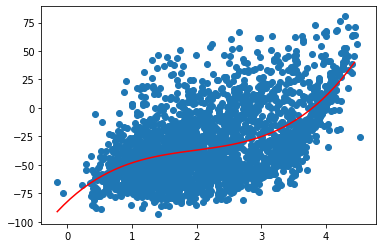

In [23]:
######
# your code here
######

#do the predictions and plot them

x_dummy2 = np.arange(np.min(train['log_minority']),np.max(train['log_minority']),0.1)
yhat_dummy_regress3_5 = regress3_5.predict(PolynomialFeatures(3, include_bias=False).fit_transform(pd.DataFrame(x_dummy2)))

plt.scatter(train['log_minority'],train['votergap'])
plt.plot(x_dummy2,yhat_dummy_regress3_5,c="r",label="Poly(3) Regression")

plt.show()

This plot helps with interpretating the results of the polynomial model (nrealy impossible to interpret the $\hat{\beta}$ coefficient estimates directly.  This plot shows that the model describes the relationship in the data pretty well: there is a slight negative relationship at most values of log_minority, but it gets much more positively sloping at the highest values of log minority (when minority is above about $e^{3.5}=33$% within a county). 

## Part 4: Variable Selection

In this part we will step through forward variable selection.  Recall our original data set has several quantitative predictors (plus `state`):

`['population','hispanic', 'minority', 'female', 
             'unemployed', 'income', 'nodegree', 'bachelor', 'inactivity', 'obesity', 'density', 
             'cancer']`

Note: several of them are extremely right-skewed and could be better incorporated using the log: population, hispanic, minority, and density (these are the most etreme right-skewed).

/Users/kevinrader/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/kevinrader/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


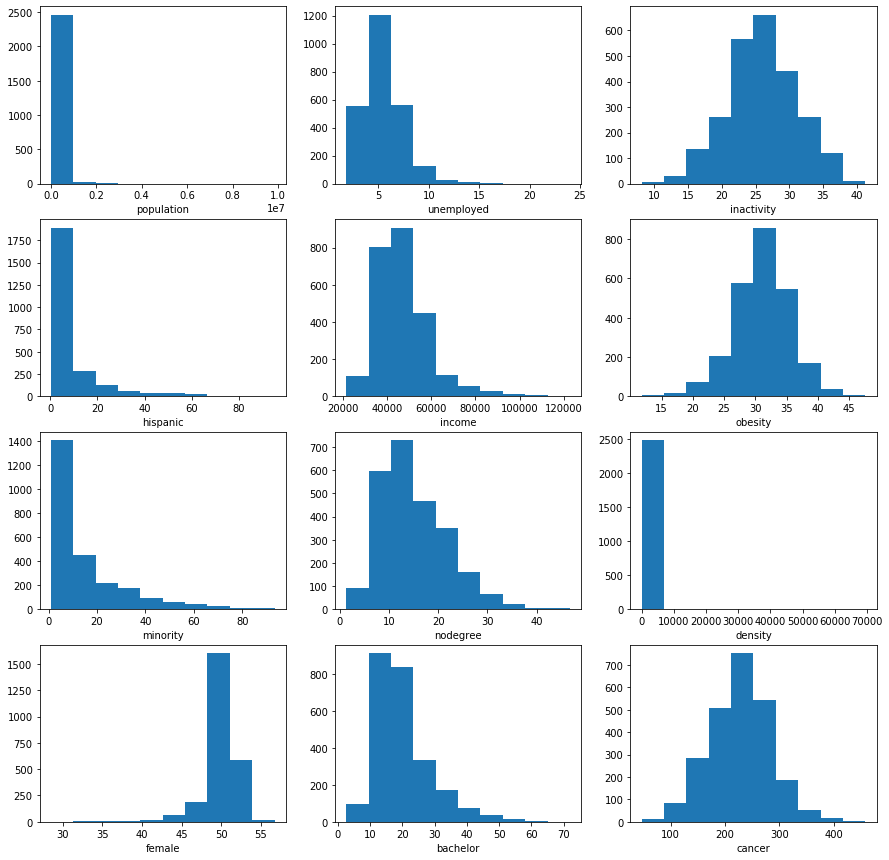

In [24]:
predictors = ['population','hispanic', 'minority', 'female', 
             'unemployed', 'income', 'nodegree', 'bachelor', 'inactivity', 'obesity', 'density', 
             'cancer']

fig, ax = plt.subplots(4, 3, figsize=(15, 15))

count = 0
for variable in predictors:
    ax[count%4][int(count/4)].hist(train[variable],)
    ax[count%4][int(count/4)].set_xlabel(variable)
    count = count + 1




In [25]:
train['log_population'] = np.log(train['population'])
train['log_hispanic'] = np.log(train['hispanic'])

test['log_population'] = np.log(test['population'])
test['log_hispanic'] = np.log(test['hispanic'])

# imputing median cancer rate for the 40 or so counties with missing cancer rates
train['cancer'].loc[train['cancer'].isnull()] = np.median(train['cancer'])
test['cancer'].loc[test['cancer'].isnull()] = np.median(train['cancer'])

/Users/kevinrader/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


**Q4.1** Fit the full *main effects* model with the 12 predictor variables listed below.  Determine its $R^2$ in the test set.

In [26]:
predictors = ['log_population','log_hispanic', 'log_minority', 'female', 
             'unemployed', 'income', 'nodegree', 'bachelor', 'inactivity', 'obesity', 'log_density']



######
# your code here
######

regress4_1 = LinearRegression(fit_intercept=True).fit(train[predictors], train['votergap'])

r2_test4_1 = sk.metrics.r2_score(test['votergap'], regress4_1.predict(test[predictors]))
print("R-squared on the test set for the main effects model:", r2_test4_1)

R-squared on the test set for the main effects model: 0.6245067302927106


**Q4.2** Fit the full *interaction* model with the 12 predictor variables and all of their interaction terms.  How many interaction terms are involved? Determine its $R^2$ in the test set.

In [27]:
######
# your code here
######
X4_2 = PolynomialFeatures(2, interaction_only=False, include_bias=True).fit_transform(train[predictors])
print("There are", X4_2.shape[1]-train[predictors].shape[1]-1,"interaction terms in the design matrix for this model.")

regress4_2 = LinearRegression(fit_intercept=False).fit(X4_2, train['votergap'])

r2_test4_2 = sk.metrics.r2_score(test['votergap'], regress4_2.predict(
    PolynomialFeatures(2, interaction_only=False, include_bias=True).fit_transform(test[predictors])))
print("R-squared on the test set for the full interaction model:", r2_test4_2)

There are 66 interaction terms in the design matrix for this model.
R-squared on the test set for the full interaction model: 0.7337869345057926


Note: the # of interaction terms is correct: ${12 \choose 2} = \frac{12\cdot 11}{2}=66$

Unfortunately there is no automatic way to do sequential variable selection in sklearn or statsmodels (we'll learn why eventually). One way to do manual variable selection is to fit the most complex model you want to consider, and start removing variables one at a time based on their p-value of their $t$-statistic, until all you are left with only statistically significant predictors (with p-values all less than 0.05) model.

The code below shows a brief outline of how to get started with this process in statsmodels:

In [28]:

# First turn the full design matrix into a panda's DataFrame
df4_3 = pd.DataFrame(X4_2)
# print(df4_3.shape)

# Fit the model with all predictors and determine which has the largest p-value
model4_3_temp = lm.OLS(train['votergap'],df4_3).fit()
print(np.argmax(model4_3_temp.pvalues))

# you can confirm it with the summary output
model4_3_temp.summary()

35


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               votergap   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     105.6
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        07:51:06   Log-Likelihood:                -10296.
No. Observations:                2491   AIC:                         2.075e+04
Df Residuals:                    2413   BIC:                         2.120e+04
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0            265.6025    118.331      2.245      0.025      33.562     497.643
1             -8.0938      8.825     -0.917      0.359     -25.399       9.211
2            -38.8069     10.968     -3.538      0.000     -60.314     -17.300
3            -42.5435     13.110     -3.245      0.001     -68.252     -16.835
4             -5.7660      3.049     -1.891      0.059     -11.745       0.213
5              3.0005      5.417      0.554      0.580      -7.622      13.623
6             -0.0004      0.001     -0.348      0.728      -0.003       0.002
7              0.8064      1.884      0.428      0.669      -2.889       4.501
8              2.0680      1.713      1.207      0.228      -1.292       5.428
9             -5.0484      2.905     -1.738      0.082     -10.744       0.647
10            -2.3099      2.991     -0.772      0.440      -8.175       3.555
11            -5.9566      5.435     -1.096      0.273     -16.615       4.702
12             0.2665      0.189      1.412      0.158      -0.103       0.636
13             0.7733      0.382      2.025      0.043       0.025       1.522
14            -2.6031      0.484     -5.379      0.000      -3.552      -1.654
15             0.3180      0.183      1.738      0.082      -0.041       0.677
16            -0.7461      0.217     -3.444      0.001      -1.171      -0.321
17         -5.619e-05   3.64e-05     -1.543      0.123      -0.000    1.52e-05
18            -0.2015      0.070     -2.876      0.004      -0.339      -0.064
19            -0.0056      0.062     -0.091      0.927      -0.127       0.115
20             0.0808      0.103      0.786      0.432      -0.121       0.282
21             0.1453      0.112      1.293      0.196      -0.075       0.366
22            -0.0699      0.176     -0.397      0.692      -0.416       0.276
23             3.8493      0.459      8.382      0.000       2.949       4.750
24            -2.0909      0.573     -3.648      0.000      -3.215      -0.967
25             0.0972      0.189      0.514      0.607      -0.274       0.468
26             2.0510      0.271      7.579      0.000       1.520       2.582
27          6.707e-05   5.65e-05      1.188      0.235   -4.36e-05       0.000
28            -0.1739      0.092     -1.897      0.058      -0.354       0.006
29            -0.1792      0.096     -1.872      0.061      -0.367       0.009
30             0.0350      0.145      0.241      0.810      -0.250       0.320
31             0.2601      0.155      1.679      0.093      -0.044       0.564
32             0.2573      0.295      0.873      0.383      -0.320       0.835
33             8.6450      0.527     16.415      0.000       7.612       9.678
34             0.3825      0.240      1.592      0.111      -0.088       0.854
35            -0.0181      0.264     -0.069      0.945      -0.536       0.500
36

In [29]:
# Now start dropping variables, one at a time
df4_3 = df4_3.drop(np.argmax(model4_3_temp.pvalues),axis=1)
df4_3.shape

(2491, 77)

In [30]:
# And refit, and redetermine the max p=value
model4_3_temp = lm.OLS(train['votergap'],df4_3).fit()
print("Predictor#: ", np.argmax(model4_3_temp.pvalues), ", with associated p-value of" ,np.max(model4_3_temp.pvalues))

Predictor#:  19 , with associated p-value of 0.9326043836265812


**Q4.3** 
Wrap the above code in a function or loop in order to find a strong predictive model.  Determine the $R^2$ in the test set for this parsimonious model.  How does it compare to the predictive ability of the models in Q4.2 and Q4.1?

In [31]:
######
# your code here
######

df4_3 = pd.DataFrame(X4_2)
cutoff = 0.20

for i in np.arange(df4_3.shape[1]):
    model4_3_temp = lm.OLS(train['votergap'],df4_3).fit()
    if(np.max(model4_3_temp.pvalues) > cutoff):
        print("Predictor#:", np.argmax(model4_3_temp.pvalues), "with associated p-value of" ,np.max(model4_3_temp.pvalues))
        df4_3 = df4_3.drop(df4_3.columns[np.argmax(model4_3_temp.pvalues)],axis=1)
    else:
        break

regress4_3 = LinearRegression(fit_intercept=False).fit(df4_3, train['votergap'])
df4_3.shape

Predictor#: 35 with associated p-value of 0.9452514196341012
Predictor#: 19 with associated p-value of 0.9326043836265812
Predictor#: 29 with associated p-value of 0.8087734967343886
Predictor#: 44 with associated p-value of 0.7844650646133605
Predictor#: 21 with associated p-value of 0.6906477299150697
Predictor#: 72 with associated p-value of 0.6967088552114471
Predictor#: 6 with associated p-value of 0.6856588515238984
Predictor#: 67 with associated p-value of 0.6546503210387729
Predictor#: 38 with associated p-value of 0.5920742318281715
Predictor#: 33 with associated p-value of 0.6155444855799296
Predictor#: 6 with associated p-value of 0.6343628058423352
Predictor#: 21 with associated p-value of 0.665270644184714
Predictor#: 63 with associated p-value of 0.581215645828604
Predictor#: 38 with associated p-value of 0.5704653351026205
Predictor#: 8 with associated p-value of 0.7500473412295154
Predictor#: 43 with associated p-value of 0.568265370931275
Predictor#: 25 with associated

(2491, 55)

In [32]:
# Below we transform the test X-variables just like we did in the training set, 
# and only use the variables we need to predict the test set using `regress4_3` 
X4_2_test = PolynomialFeatures(2, interaction_only=False, include_bias=True).fit_transform(test[predictors])
X4_3_test = pd.DataFrame(X4_2_test)[df4_3.columns]

######
# Your code below: Determine R-sq on test
######
r2_test4_3 = sk.metrics.r2_score(test['votergap'], regress4_3.predict(X4_3_test))
print("R-squared on the test set for the reduced model:", r2_test4_3)

R-squared on the test set for the reduced model: 0.7309717201678123


Even though we have a nice parsimonious model here, we have actually lost a little bit of explanatory power on the test set: the full interaction model had a test $R^2$ of 0.734 while it is 0.731 here.  This is likely due to trimming off some important predictors towards the end of the process even though their p-values were greater than 0.05.  Using a higher cut-off (possibly of 0.30 or 0.35) may be a better choice for out-of-sample prediction here, or use a different metric (like AIC) for choosing which variable to drop and when to stop.